<a href="https://colab.research.google.com/github/mostafahadizadeh1991/Machine_learning_Eindhoven/blob/main/Machine_learning_Eindhoven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Eindhoven_University_of_Technology_logo.svg/800px-Eindhoven_University_of_Technology_logo.svg.png" width="400"/>


# **PREDICTION OF EURUSD END-OF-DAY TRADED VOLUME USING DEEP LEARNING ON 2007-2020** 


# **Introduction:**

---

---


The prediction of the end-of-day traded volume is an important quantity in finance. In particular, this is used by execution algorithms in high-frequency trading. The traded volume allows us to estimate the characteristic size of the asset that needs to be either bought or liquidated, and the related market impact ([inter alia, Almgren and Chriss, 2001, Gatheral, 2010](#Almgren)).

The ECB publishes a daily fixing for selected EUR end-of-day traded volume: these reference mid-rates are based on a daily concertation procedure between central banks within and outside the European System of Central Banks, which normally takes place at 2.15 p.m. ECB time. The reference end-of-day traded volume are published both by electronic market information providers and on the ECB’s website shortly after the concertation procedure has been completed. Although only a reference rate, many financial institutions are ready to trade at the EUR fixing and it is therefore possible to leave orders with a bank for business to be transacted at this level. The ECB daily fixing of the EUR/USD is therefore a tradable level that makes using it a more realistic alternative to, say, London closing prices and this is the series that we investigate in this notebook. We examined the ECB daily fixing of the EUR/USD since its first trading day on 4 January 2007 until 31 December 2020.

In financial applications, [Kamijo and Tanigawa (1990)](#Kamijo) applied them successfully to the recognition of stock patterns of the Tokyo stock exchange whereas [Tenti (1996)](#Tenti) achieved remarkable results using RNNs to forecast the exchange rate of the Deutsche Mark. [Tino, Schittenkopf and Doffner (2001)](#Tino) use them to trade successfully the volatility of the DAX and the FTSE 100 using straddles whereas [Dunis and Huang (2002)](#Dunis), using continuous implied volatility data from the currency options market, obtain remarkable results for their GBP/USD and USD/JPY exchange rate volatility trading simulation


The motivation of this notebook is to investigate the use of a Deep learning when applied to the task of forecasting and trading the Euro/Dollar (EUR/USD) end-of-day traded volume using the European Central Bank (ECB) fixing series.

A model that predicts the total end-of-day volume and updates the prediction as new intraday information is observed and proposed. This model is a time-varying coefficients model which is estimated using the framework of functional data. 






 





# **Data and Methods:**

This section presents some statistical properties of the EURUSD series both as a whole and through time.

For this porpuse I received EURUSD daily data from the https://forexsb.com/historical-forex-data and as shown in the following figure I plotted all historical parameters of EURUSD.


In [ ]:
import pandas as pd
import csv
import datetime

EURUSD1440csv = "/content/drive/MyDrive/Machine_learning_Eindhoven/EURUSD1440.csv"
EURUSD1440json = "/content/drive/MyDrive/Machine_learning_Eindhoven/EURUSD1440.json"

data = []

with open(EURUSD1440csv, 'r') as f:
    reader = csv.reader(f)
    next(f)
    for row in reader:
      dt = datetime.datetime.strptime(row[0], "%Y-%m-%d %H:%M")
      data.append('['+str(dt.timestamp()*1000)+',' +row[1]+','+row[2]+','+row[3]+','+row[4]+','+row[5]+']')

with open(EURUSD1440json, 'w') as f:
    f.write('[%s]' % ', '.join(map(str, data)))


In [43]:
%%html 
<body>  
<div class="chart-wrapper"><div class="chart-inner">
<div id="container" style="width:100%; height: 100%;"></div></div></div>

 </body>  
<html>  
 <head>  
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">  
  <title>Highcharts Example</title>  
  
<script src="https://cdnjs.cloudflare.com/ajax/libs/proj4js/2.3.6/proj4.js"></script>
<script src="https://code.highcharts.com/stock/highstock.js"></script>
<script src="https://code.highcharts.com/maps/modules/map.js"></script>
<script src="https://code.highcharts.com/modules/data.js"></script>
<script src="https://code.highcharts.com/mapdata/countries/in/in-all.js"></script>
<style>
  .chart-wrapper {
 position: relative;
    padding-bottom: 50%;
    width:80%;
    float:left;
}

.chart-inner {
position: absolute;
    width: 100%; height: 100%;
}
</style>


<script>
Highcharts.getJSON('https://raw.githubusercontent.com/mostafahadizadeh1991/Machine_learning_Eindhoven/main/EURUSD1440.json', function (data) {

    // split the data set into ohlc and volume
    var ohlc = [],
        volume = [],
        dataLength = data.length,
        // set the allowed units for data grouping
        groupingUnits = [[
            'week',                         // unit name
            [1]                             // allowed multiples
        ], [
            'month',
            [1, 2, 3, 4, 6]
        ]],

        i = 0;

    for (i; i < dataLength; i += 1) {
        ohlc.push([
            data[i][0], // the date
            data[i][1], // open
            data[i][2], // high
            data[i][3], // low
            data[i][4] // close
        ]);

        volume.push([
            data[i][0], // the date
            data[i][5] // the volume
        ]);
    }


    // create the chart
    Highcharts.stockChart('container', {

        rangeSelector: {
            selected: 1
        },

        title: {
            text: 'EURUSD Historical'
        },

        yAxis: [{
            labels: {
                align: 'right',
                x: -3
            },
            title: {
                text: 'OHLC'
            },
            height: '60%',
            lineWidth: 2,
            resize: {
                enabled: true
            }
        }, {
            labels: {
                align: 'right',
                x: -3
            },
            title: {
                text: 'Volume'
            },
            top: '65%',
            height: '35%',
            offset: 0,
            lineWidth: 2
        }],

        tooltip: {
            split: true
        },
        plotOptions: {
            candlestick: {
                color: 'blue',
                upColor: 'red'
            }
        },
        series: [{
            type: 'candlestick',
            name: 'AAPL',
            data: ohlc,
            dataGrouping: {
                units: groupingUnits
            }
        }, {
            type: 'column',
            name: 'Volume',
            data: volume,
            yAxis: 1,
            dataGrouping: {
                units: groupingUnits
            }
        }]
    });
});

</script>

 </head>  

</html> 

# **Main Section:**



---

---

In this section I designed a deep learning method that predicted end-of-day traded volume of EURUSD. For this purpose I considered 30 percent of data as validation set and 70 percent as training set.



In [1]:
import tensorflow as tf
from keras.layers.core import Masking, RepeatVector
from keras.layers.wrappers import TimeDistributed
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Conv1D, Lambda, LSTM, Bidirectional, SimpleRNN, Dense
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import mean_absolute_error
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import csv

Text(0.5, 1.0, 'EURUSD End-of-day traded volume')

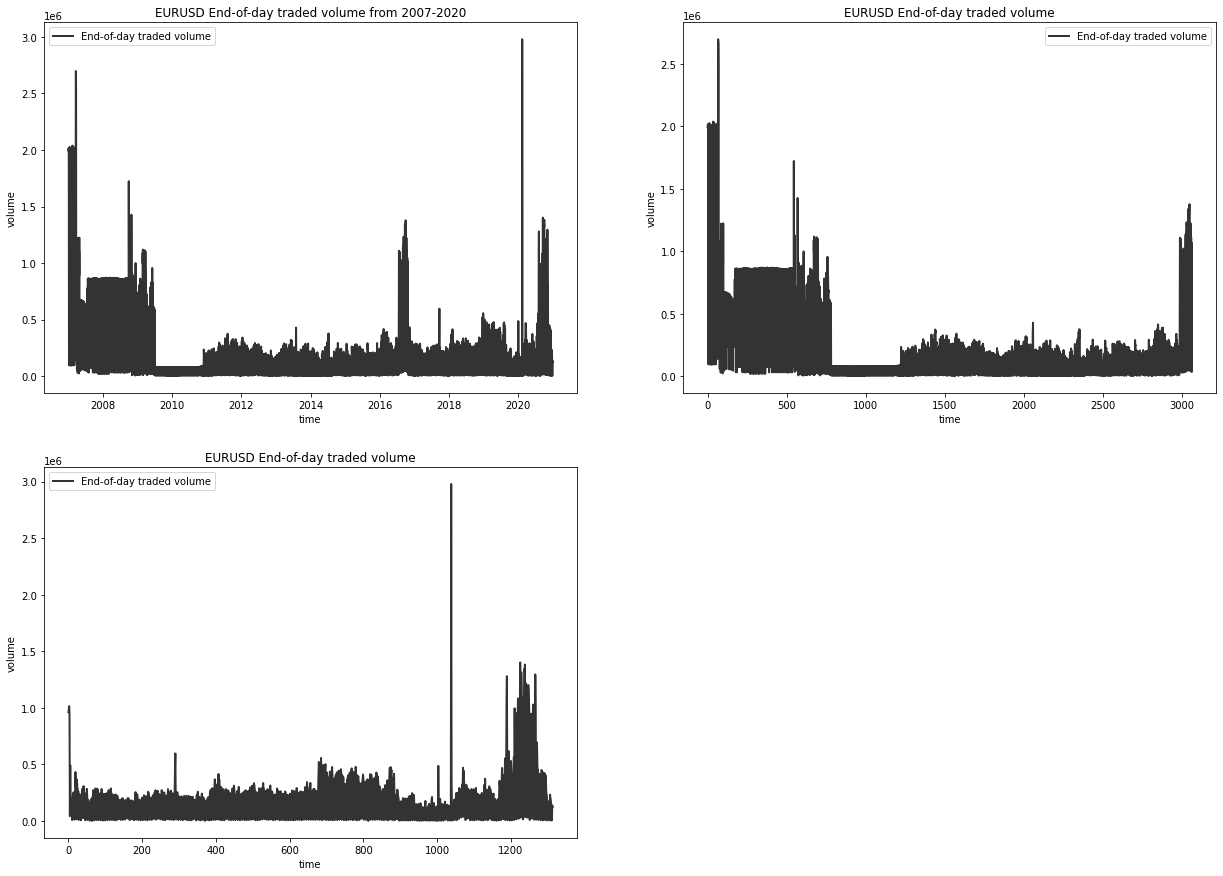

In [2]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig = plt.subplots(figsize = (21,15))

ax = plt.subplot(221)


data = pd.read_csv("/content/drive/MyDrive/Machine_learning_Eindhoven/EURUSD1440.csv",sep=",")
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

data_columns = ['vol']

ax.plot(data[data_columns], linewidth=2, color='0.2', label='End-of-day traded volume')

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('volume')
ax.set_title('EURUSD End-of-day traded volume from 2007-2020')

# Convert to numpy arrays
vol = data[data_columns].values.tolist()
#remove 'nan' data
vol = [x for x in vol if str(x) != 'nan']
vols_final = np.array(vol)
id = len(vols_final)

#0.7 is training set section
criteria = int(id*0.7)
training_vol = vols_final[: criteria]
validation_vol = vols_final[criteria:]


ax1 = plt.subplot(222)
ax1.plot(training_vol, linewidth=2, color='0.2', label='End-of-day traded volume')
ax1.legend()
ax1.set_xlabel('time')
ax1.set_ylabel('volume')
ax1.set_title('EURUSD End-of-day traded volume')

ax2 = plt.subplot(223)
ax2.plot(validation_vol, linewidth=2, color='0.2', label='End-of-day traded volume')
ax2.legend()
ax2.set_xlabel('time')
ax2.set_ylabel('volume')
ax2.set_title('EURUSD End-of-day traded volume')



In [3]:
def get_windowed_dataset(series, window_size, batch_size, shuffle_buffer_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda win: win.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer_size)\
        .map(lambda win: (win[: -1], win[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds

def get_forecast(model, series, window_size, batch_size, shuffle_buffer_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda win: win.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [4]:
WINDOW_SIZE = 60
BATCH_SIZE = 128
BUFFER_SIZE = 1000

ds_vol = get_windowed_dataset(training_vol, WINDOW_SIZE, BATCH_SIZE, BUFFER_SIZE)

model = tf.keras.Sequential([
    Masking(input_shape=[None, 1]),
    LSTM(128, return_sequences=True),
    LSTM(128),
    RepeatVector(16),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    TimeDistributed(Dense(64, activation='relu')),
    Dense(1),
    Lambda(lambda x: x * 25.0)
])




lr_scheduler = LearningRateScheduler(lambda epoch: 1e-8 * 10 ** (epoch / 20))

model.compile(loss=Huber(), optimizer=SGD(lr=1e-8, momentum=0.9), metrics=['mae'])
hist_vol = model.fit(ds_vol, epochs=20, callbacks=[lr_scheduler], verbose=2)


Epoch 1/20
24/24 - 18s - loss: 291124.7500 - mae: 291125.0625
Epoch 2/20
24/24 - 11s - loss: 291124.7812 - mae: 291125.1250
Epoch 3/20
24/24 - 11s - loss: 291124.7500 - mae: 291125.0625
Epoch 4/20
24/24 - 11s - loss: 291124.7500 - mae: 291125.0625
Epoch 5/20
24/24 - 11s - loss: 291124.7812 - mae: 291125.1250
Epoch 6/20
24/24 - 11s - loss: 291124.7188 - mae: 291125.0625
Epoch 7/20
24/24 - 11s - loss: 291124.7188 - mae: 291125.0625
Epoch 8/20
24/24 - 11s - loss: 291124.7188 - mae: 291125.0625
Epoch 9/20
24/24 - 11s - loss: 291124.7188 - mae: 291125.0625
Epoch 10/20
24/24 - 11s - loss: 291124.3438 - mae: 291124.8750
Epoch 11/20
24/24 - 11s - loss: 291124.1875 - mae: 291124.8125
Epoch 12/20
24/24 - 11s - loss: 291124.2188 - mae: 291124.8750
Epoch 13/20
24/24 - 11s - loss: 291124.1875 - mae: 291124.8125
Epoch 14/20
24/24 - 11s - loss: 291124.1875 - mae: 291124.7500
Epoch 15/20
24/24 - 11s - loss: 291124.1250 - mae: 291124.7500
Epoch 16/20
24/24 - 11s - loss: 291124.0625 - mae: 291124.7500
E

Text(0.5, 1.0, 'Learning Rate End-of-day traded volume Training set')

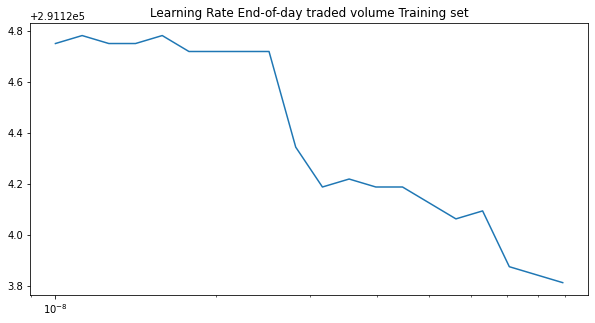

In [5]:
fig = plt.subplots(figsize = (10,5))

ax = plt.subplot(111)
ax.semilogx(hist_vol.history['lr'], hist_vol.history['loss'])
ax.set_title('Learning Rate End-of-day traded volume Training set')


In [7]:
model.compile(loss=Huber(), optimizer=SGD(lr=3e-5, momentum=0.9), metrics=['mae'])
history_vol = model.fit(ds_vol, epochs=30, verbose=2)


Epoch 1/30
24/24 - 18s - loss: 291111.7812 - mae: 291112.2500
Epoch 2/30
24/24 - 11s - loss: 290960.3125 - mae: 290960.8438
Epoch 3/30
24/24 - 11s - loss: 257124.4531 - mae: 257124.9531
Epoch 4/30
24/24 - 14s - loss: 210134.8281 - mae: 210135.3125
Epoch 5/30
24/24 - 14s - loss: 203742.1094 - mae: 203742.5781
Epoch 6/30
24/24 - 11s - loss: 207200.0625 - mae: 207200.5469
Epoch 7/30
24/24 - 11s - loss: 219841.6875 - mae: 219842.1875
Epoch 8/30
24/24 - 11s - loss: 250564.6406 - mae: 250565.1250
Epoch 9/30
24/24 - 11s - loss: 206909.4219 - mae: 206909.8906
Epoch 10/30
24/24 - 11s - loss: 202686.8125 - mae: 202687.3125
Epoch 11/30
24/24 - 11s - loss: 202735.0156 - mae: 202735.4844
Epoch 12/30
24/24 - 11s - loss: 208112.2500 - mae: 208112.7344
Epoch 13/30
24/24 - 11s - loss: 227357.2344 - mae: 227357.7656
Epoch 14/30
24/24 - 11s - loss: 208472.2656 - mae: 208472.7656
Epoch 15/30
24/24 - 11s - loss: 210469.2812 - mae: 210469.7500
Epoch 16/30
24/24 - 11s - loss: 233821.7500 - mae: 233822.1875
E

In [11]:
forecast_vol = get_forecast(model, vols_final[..., np.newaxis], WINDOW_SIZE, BATCH_SIZE, BUFFER_SIZE)


In [12]:
result_vol = forecast_vol[criteria - WINDOW_SIZE: -1, 0]


Text(0.5, 1.0, 'Comparison EURUSD End-of-day traded volume Validation set and predicted')

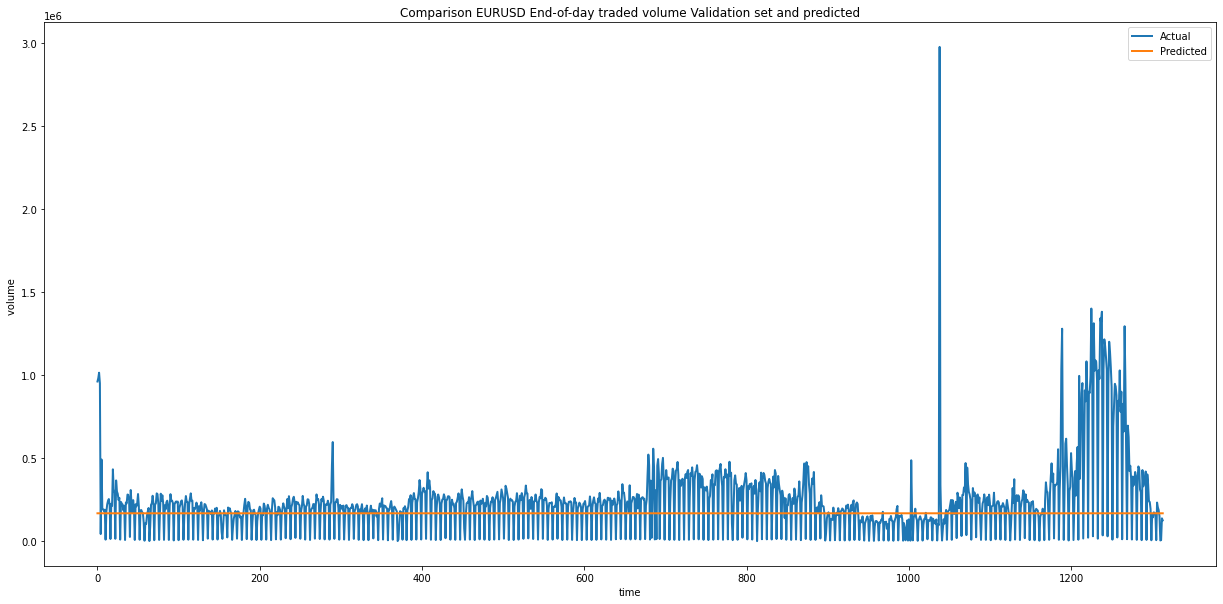

In [13]:
fig = plt.subplots(figsize = (21,10))

ax = plt.subplot(111)
ax.plot(validation_vol, linewidth=2, label='Actual')
ax.plot(result_vol, linewidth=2, label='Predicted')

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('volume ')
ax.set_title('Comparison EURUSD End-of-day traded volume Validation set and predicted')


Text(0.5, 1.0, 'Comparison EURUSD End-of-day traded volume Loss and MAE')

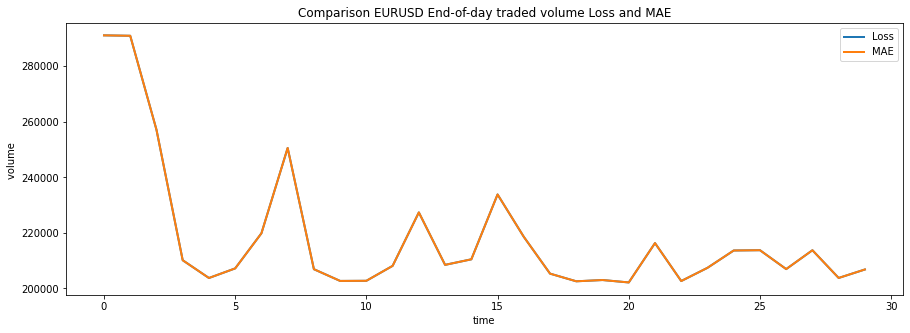

In [15]:
loss_vol = history_vol.history['loss']
mae_vol = history_vol.history['mae']


fig = plt.subplots(figsize = (15,5))
epochs = range(30)

ax = plt.subplot(111)
ax.plot(epochs, loss_vol, linewidth=2, label='Loss')
ax.plot(epochs, mae_vol, linewidth=2, label='MAE')

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('volume ')
ax.set_title('Comparison EURUSD End-of-day traded volume Loss and MAE')



# **References:**



---

---
<a name="Almgren"></a>
1. Almgren, R., and N. Chriss. 2001. Optimal Execution of Portfolio Transactions. The Journal of Risk 3: 5–40

2. Gatheral, J. 2010. No-Dynamic-Arbitrage and Market Impact. Quantitative Finance 10: 749–759.
<a name="Kamijo"></a>
3. Kamijo, K. and Tanigawa, T., Stock price pattern recognition: a recurrent neural network approach, In Proceedings of the International Joint Conference on Neural Networks, 1990, pp. 1215–1221.
<a name="Tenti"></a>
4. Tenti, P., Forecasting foreign exchange rates using recurrent neural networks. Appl. Artif. Intell., 1996, 10, 567–581.
<a name="Tino"></a>
5. Tino, P., Schittenkopf, C. and Doffner, G., Financial volatility trading using recurrent networks. IEEE Trans. Neural Netw., 2001, 12, 865–874.
<a name="Dunis"></a>
6. Dunis, C. and Huang, X., Forecasting and trading currency volatility: an application of recurrent neural regression and model combination. J. Forecast., 2002, 21, 317–354.
